Import Required Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load the Dataset

In [10]:
df = pd.read_csv("/content/emails.csv.zip")
results_df = pd.DataFrame(results).T

Data Preprocessing

In [3]:
df.drop(columns=['Email No.'], inplace=True)
X = df.drop(columns=['Prediction'])
y = df['Prediction']  # Labels (0 = not spam, 1 = spam)

Split Dataset into Training and Testing Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

Train and Evaluate Each Model

In [7]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Cross-Val Accuracy": cross_val_score(model, X, y, cv=5).mean()
    }

In [8]:
results_df = pd.DataFrame(results).T
print("\n📈 Model Performance Summary:\n")
print(results_df)


📈 Model Performance Summary:

                     Accuracy  Precision    Recall  F1 Score  \
Logistic Regression  0.982609   0.957792  0.983333  0.970395   
Decision Tree        0.925604   0.875421  0.866667  0.871022   
SVM                  0.812560   0.884058  0.406667  0.557078   
Random Forest        0.962319   0.930693  0.940000  0.935323   

                     Cross-Val Accuracy  
Logistic Regression            0.962101  
Decision Tree                  0.915117  
SVM                            0.795620  
Random Forest                  0.956494  


Plot Accuracy, Precision, Recall, F1 Score

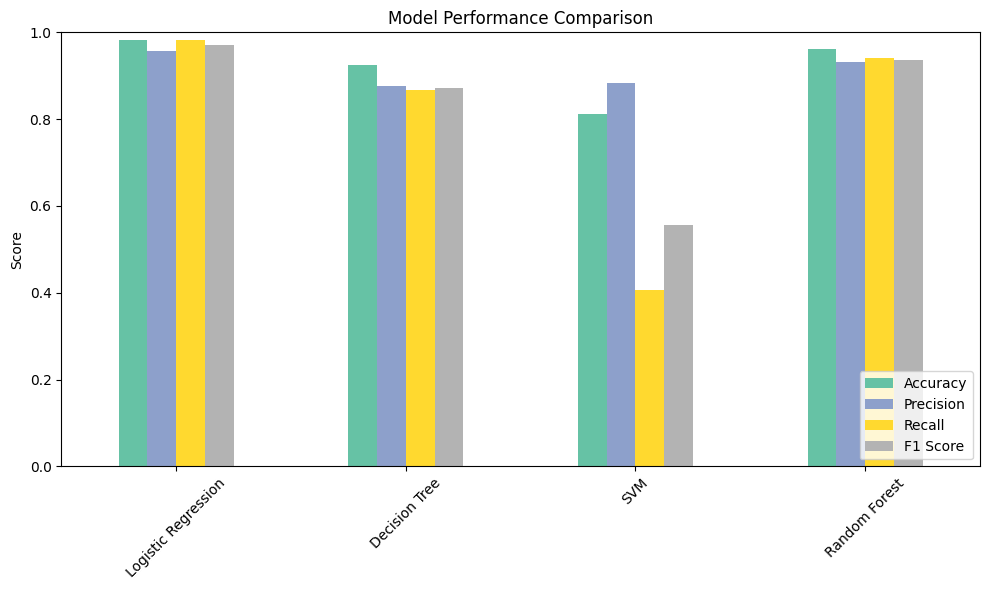

In [11]:
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score"]
results_df[metrics_to_plot].plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()